# Gaussian Mixture Models

`StatTools` implements parameter estimation for Gaussian mixture models using the EM algorithm in its `mixture.GaussianMixture` class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.mixture import GaussianMixture
from stattools.mixture import GaussianMixtureDensity
from stattools.datasets import load_old_faithful

## Example: Old Faithful data set

Our data consist of 272 pairs of eruption durations and waiting times until the next eruption (both measured in minutes) of the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

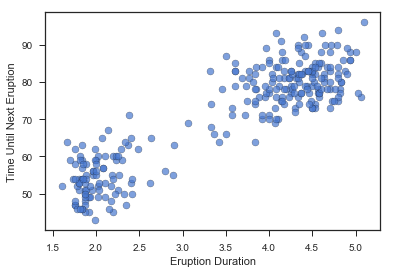

In [2]:
data = load_old_faithful()

plt.figure()
plt.scatter(data.Duration, data.Wait, edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

The scatter plot shows two clear clusters, suggesting a Gaussian mixture model with two components.

In [3]:
%%time
gmm = GaussianMixture(k=2, random_state=0)
gmm.fit(data)
print(f"Final log-likelihood:                          {gmm.log_likelihood(data):.3f}")
print(f"Akaike information criterion (AIC):            {gmm.aic(data, correction=False):.3f}")
print(f"Corrected Akaike information criterion (AICc): {gmm.aic(data):.3f}")
print(f"Bayesian  information criterion (BIC):         {gmm.bic(data):.3f}")

Final log-likelihood:                          -1130.272
Akaike information criterion (AIC):            2282.544
Corrected Akaike information criterion (AICc): 2261.559
Bayesian  information criterion (BIC):         2322.208
CPU times: user 1.43 s, sys: 28.3 ms, total: 1.46 s
Wall time: 1.52 s


We can use the Gaussian mixture models as an unsupervised classifier to group the data into two clusters.

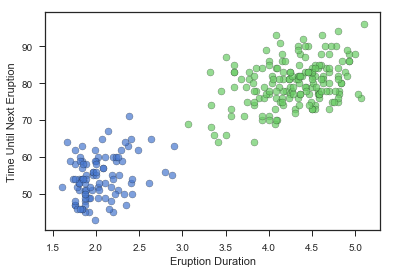

In [4]:
labels = gmm.predict(data)
x = data.Duration
y = data.Wait
plt.figure()
for i in range(2):
    plt.scatter(x[labels == i], y[labels == i], edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

We can extract the underlying Gaussian mixture density from the Gaussian mixture model using the `pdf` property, which returns a `GaussianMixtureDensity` object.
Then we can plot the contours of the estimated density function using the `plot()` method.

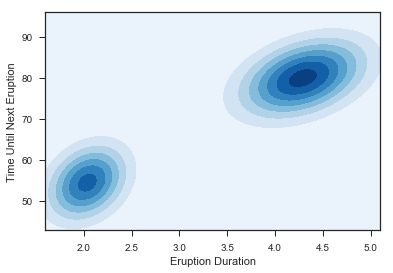

In [5]:
plt.figure()
plt.xlim(min(data.Duration), max(data.Duration))
plt.ylim(min(data.Wait), max(data.Wait))
gmm.pdf.plot(cmap="Blues", zorder=0)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

## Example: Simulated 1D mixture

We will simulate data from a mixture of three different one-dimensional Gaussian distributions.

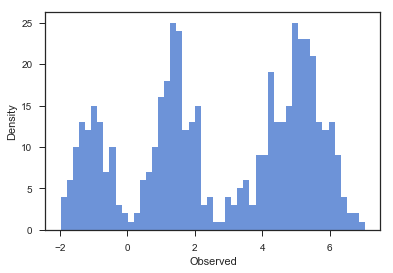

In [6]:
# Random number generator
rs = np.random.RandomState(0)

# True parameters
means = [-1, 1.5, 5]
covs = [0.25, 0.25, 0.8]
weights = [0.2, 0.3, 0.5]

# Sample size
n = 500

# Create a Gaussian mixture distribution/density object
mixture = GaussianMixtureDensity(means=means, covs=covs, weights=weights, random_state=rs)

# Sample from the Gaussian mixture density
x = mixture.sample(n=n)

plt.figure()
plt.hist(x, bins=50, color="b", alpha=0.8)
plt.xlabel("Observed")
plt.ylabel("Density")
plt.show()
plt.close()

In [7]:
%%time
gmm = GaussianMixture(k=3, random_state=rs)
gmm.fit(x)
print("Estimates:")
print(f"Means:     {gmm.means.reshape(-1)}")
print(f"Variances: {gmm.covs.reshape(-1)}")
print(f"Weights:   {gmm.weights.reshape(-1)}")

Estimates:
Means:     [-1.06189486  1.4051836   4.97703146]
Variances: [0.20693854 0.26630793 0.70509885]
Weights:   [0.19020037 0.31457721 0.49522242]
CPU times: user 1.94 s, sys: 19 ms, total: 1.96 s
Wall time: 2.04 s


We can plot the Gaussian mixture model density estimate using the `plot()` method of the `pdf` property (which returns a `GaussianMixtureDensity`.

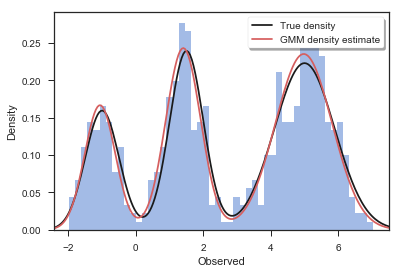

In [8]:
plt.figure()
plt.hist(x, bins=50, density=True, color="b", alpha=0.5)
mixture.plot(c="k", label="True density")
gmm.pdf.plot(c="r", label="GMM density estimate")
plt.legend(loc="best", frameon=True, shadow=True)
plt.xlabel("Observed")
plt.ylabel("Density")
plt.show()
plt.close()

## Example: Simulated 2D mixture

We will simulate data from a mixture of five different bivariate Gaussian distributions.
Their scatter plot uses color to indicate which component each observation comes from.

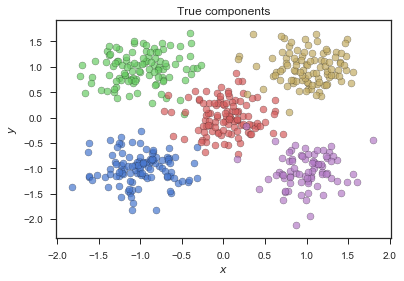

In [9]:
# Random number generator
rs = np.random.RandomState(0)

# True parameters
means = [[-1, -1], [-1, 1], [0, 0], [1, -1], [1, 1]]
covs = 0.1

# Sample size
n = 500

# Create a Gaussian mixture distribution/density object
mixture = GaussianMixtureDensity(means=means, covs=covs, random_state=rs)

# Sample from the distribution
xy, comp = mixture.sample(n=n, return_component=True)
x = xy[:, 0]
y = xy[:, 1]

plt.figure()
for i in range(mixture.k):
    plt.scatter(x[comp == i], y[comp == i], edgecolor="k", alpha=0.7)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("True components")
plt.show()
plt.close()

Next we will plot the true contours of the Gaussian mixture.

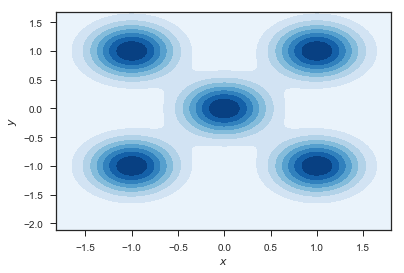

In [10]:
plt.figure()
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
mixture.plot(cmap="Blues", zorder=0)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()
plt.close()

Now we will estimate the known parameters using a Gaussian mixture model.
We plot the contours of the reulting mixture density.

In [11]:
%%time
gmm = GaussianMixture(k=5, random_state=rs)
gmm.fit(xy)

CPU times: user 5.47 s, sys: 68.2 ms, total: 5.54 s
Wall time: 5.81 s


We plot the contours of the resulting mixture density.

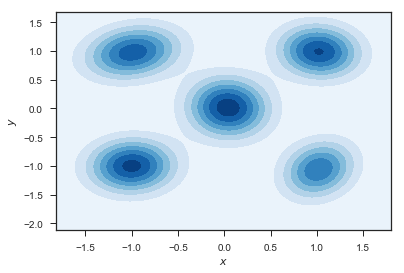

In [12]:
plt.figure()
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
gmm.pdf.plot(cmap="Blues", zorder=0)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()
plt.close()

We use the model to cluster the data.

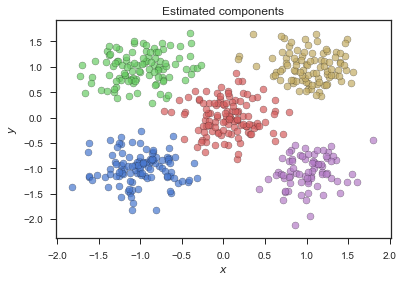

In [13]:
comp = gmm.predict(xy)

plt.figure()
for i in range(mixture.k):
    plt.scatter(x[comp == i], y[comp == i], edgecolor="k", alpha=0.7)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Estimated components")
plt.show()
plt.close()